# Primer Parcial de Introduccion al Modelado Continuo 1er Cuatrimestre 2024

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

### Ejercicio 1

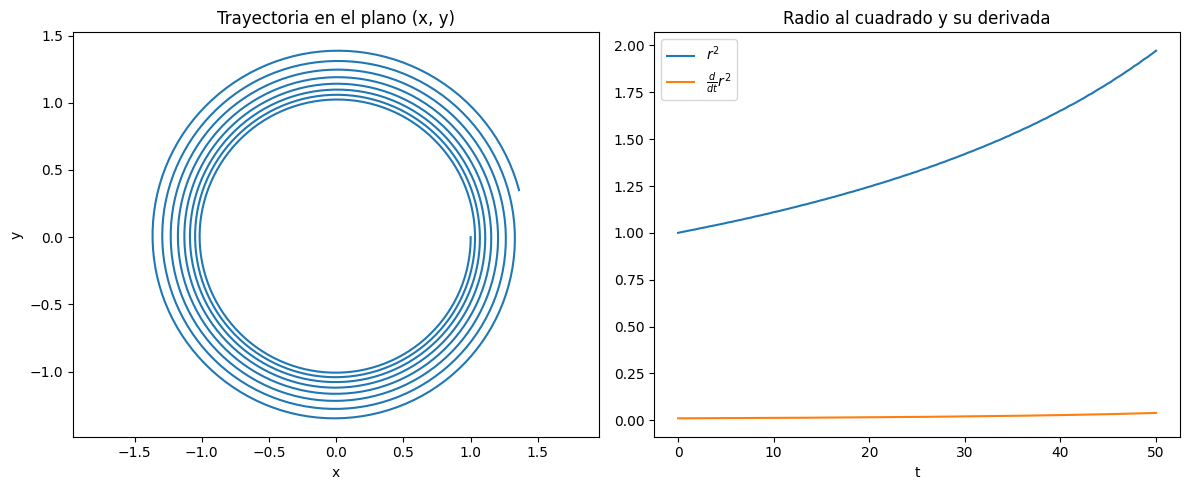

In [22]:

# Sistema
def sistema(t, z, a):
    x, y = z
    dxdt = y + a * x * (x**2 + y**2)
    dydt = -x + a * y * (x**2 + y**2)
    return [dxdt, dydt]

# Derivada del radio al cuadrado
def dr2_dt(t, z, a):
    x, y = z
    dx, dy = sistema(t, z, a)
    return 2 * x * dx + 2 * y * dy

# Parámetros
a = 0.005
z0 = [1, 0]  # Condición inicial
t_span = (0, 50)
t_eval = np.linspace(*t_span, 1000)

# Resolver el sistema
sol = solve_ivp(sistema, t_span, z0, args=(a,), t_eval=t_eval)

# Calcular r^2 y su derivada
r2 = sol.y[0]**2 + sol.y[1]**2
dr2 = [dr2_dt(t, [x, y], a) for t, x, y in zip(sol.t, sol.y[0], sol.y[1])]

# Graficar la trayectoria
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(sol.y[0], sol.y[1])
plt.title("Trayectoria en el plano (x, y)")
plt.xlabel("x")
plt.ylabel("y")
plt.axis('equal')

plt.subplot(1, 2, 2)
plt.plot(sol.t, r2, label=r"$r^2$")
plt.plot(sol.t, dr2, label=r"$\frac{d}{dt}r^2$")
plt.title("Radio al cuadrado y su derivada")
plt.xlabel("t")
plt.legend()

plt.tight_layout()
plt.show()


### Ejercicio 2

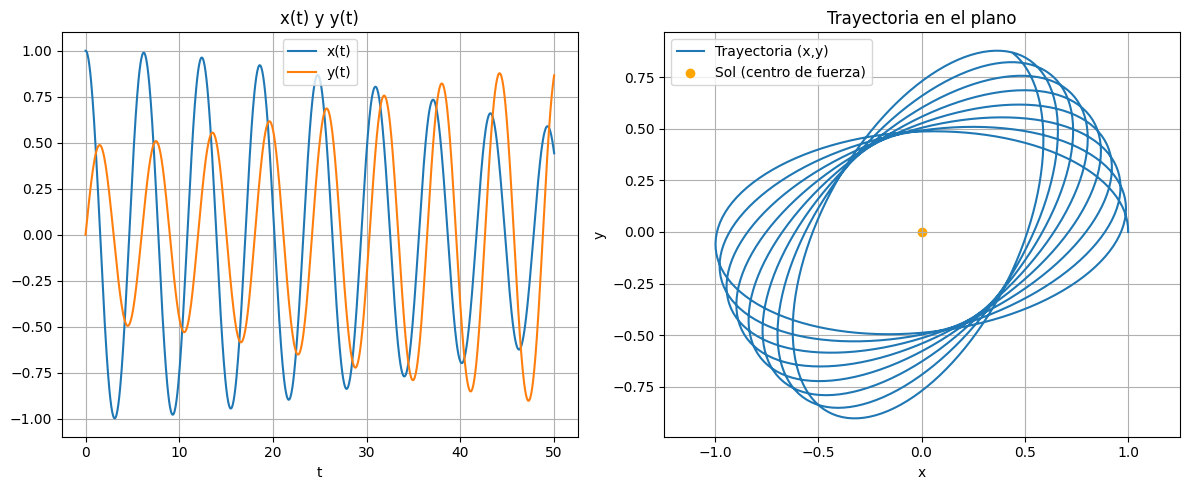

In [45]:
def sistema(t,z,r=0.1):
    x, y, vx, vy = z
    dxdt = vx
    dydt = vy
    dvxdt = -x / (x**2 + y**2)**r 
    dvydt = -y / (x**2 + y**2)**r 
    return [dxdt,dydt,dvxdt,dvydt]

# Parámetros

z0 = [1,0,0.01,0.5] # valores iniciales
r = 0
t_span = (0,50)
t_eval = np.linspace(*t_span,1000)

sol = solve_ivp(sistema, t_span, z0, t_eval=t_eval)

# Gráfico
# Graficar x(t), y(t)
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(sol.t,sol.y[0],label="x(t)")
plt.plot(sol.t,sol.y[1],label="y(t)")
plt.xlabel("t")
plt.title("x(t) y y(t)")
plt.legend()
plt.grid(True)

# Graficar trayectoria (x,y)
plt.subplot(1,2,2)
plt.plot(sol.y[0],sol.y[1], label="Trayectoria (x,y)")
plt.scatter([0], [0], color='orange', label="Sol (centro de fuerza)")
plt.axis('equal')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Trayectoria en el plano")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


### Ejercicio 3

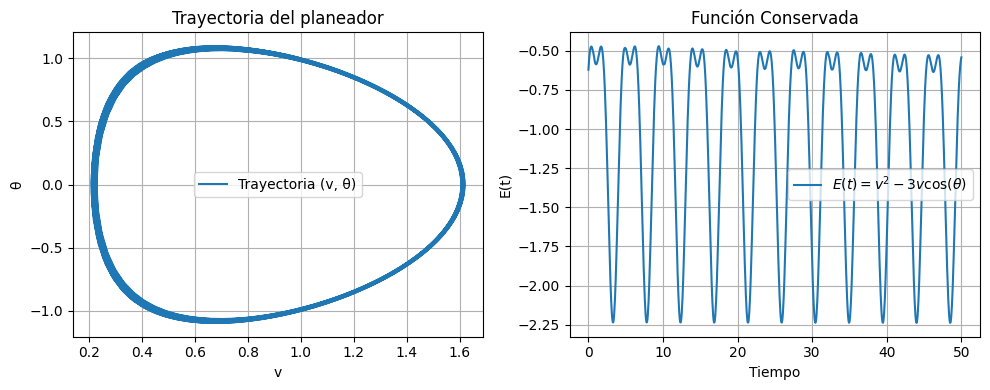

In [56]:
import math as mt

def sistema(t,z,D):
    v,tita = z
    dvdt = -mt.sin(tita) - D*v**2
    dtitadt = 1/v * (-mt.cos(tita) + v**2)
    return [dvdt,dtitadt]

# Parámetros
D = 0
t_span = (0,50)
t_eval = np.linspace(*t_span,1000)
z0 = [1,1]

sol = solve_ivp(sistema,t_span,z0,t_eval = t_eval,args=(D,))

# Calcular función conservada E(t)
v = sol.y[0]
tita = sol.y[1]
E = v**2 - 3 * v * np.cos(tita)

# Graficar trayectoria en el espacio (v, θ)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(v, tita, label="Trayectoria (v, θ)")
plt.xlabel("v")
plt.ylabel("θ")
plt.title("Trayectoria del planeador")
plt.grid()
plt.legend()

# Graficar E(t)
plt.subplot(1, 2, 2)
plt.plot(sol.t, E, label=r"$E(t) = v^2 - 3v\cos(\theta)$")
plt.xlabel("Tiempo")
plt.ylabel("E(t)")
plt.title("Función Conservada")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

### Ejercicio 4